In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
NGS = pd.read_csv('https://docs.google.com/spreadsheets/d/1LZkQA8vbUMPHMTvGAZQ3KSmTBKNA98iJQvIy85XXdn8/export?gid=0&format=csv')
NGS=NGS.dropna()
NGS = NGS[NGS.NewsGuard.apply(lambda x: True if '100' in x else False)].reset_index(drop=True)
NGS_d = dict(zip(NGS['Link'],NGS['NewsGuard']))

In [3]:
#merge_corpus = pd.read_csv('../Labelling Task/Labelled Files/Manual/merged.csv')

In [4]:
merge_corpus = pd.read_csv("../data/merged3_mturk.csv")

In [5]:
ratings = pd.read_csv('../data/ratings-00000.tsv', sep='\t')

In [7]:
new_links=[]
c=0
for index,row in merge_corpus.iterrows():
    note = row['summary']
    links = re.findall("http.+?\..+?/",note)
    scores=[]
    bwl=[]
    if not links: c+=1
    for l in links:
        if l not in NGS_d:
            new_links.append(l)
    

In [8]:
3043-c

2231

In [9]:
s=pd.read_csv('https://docs.google.com/spreadsheets/d/1LZkQA8vbUMPHMTvGAZQ3KSmTBKNA98iJQvIy85XXdn8/export?gid=0&format=csv').Link
all_links = list(s)

In [10]:
left_links = [x for x in new_links if x not in all_links and x.replace('https','http') not in all_links \
 and x.replace('www.','') not in all_links and x.replace('https','http').replace('www.','') not in all_links]

In [11]:
len(left_links)

427

In [12]:
len(set(left_links))

425

In [13]:
Counter(left_links).most_common()

[('https://www.sos.ca.gov/', 2),
 ('https://weather.com/', 2),
 ('https://www.jpl.nasa.gov/', 1),
 ('https://www.sciencedaily.com/', 1),
 ('https://elections.cdn.sos.ca.gov/', 1),
 ('https://www.mining-technology.com/', 1),
 ('https://www.developgoodhabits.com/', 1),
 ('https://www.gettyimages.com/', 1),
 ('https://www.ncleg.gov/', 1),
 ('https://m.economictimes.com/', 1),
 ('https://www.mpnrc.org/', 1),
 ('https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2F2019-ncov%2Fmore%2Fmasking-science-sars-cov2.html  2. Masking - in conjunction with hand washing - reduces rather than causes RSV cases https:/',
  1),
 ('https://embryo.asu.edu/', 1),
 ('https://helix.northwestern.edu/', 1),
 ('https://qz.com/', 1),
 ('https://www.ybnllc.com/', 1),
 ('https://nij.ojp.gov/', 1),
 ('https://www.thedrive.com/', 1),
 ('https://www.hennepin.us/', 1),
 ('https://duckduckgo.com/', 1),
 ('https://www.lasvegasnevada.gov/', 1),
 ('https://educationpost.org/', 1),
 ('https://www.jdsupra.com/', 1),
 ('https://politi.co

In [14]:
merge_corpus['has_link']=merge_corpus.summary.apply(lambda x: True if re.findall("http.+?\..+?/",x) else False)

In [15]:
all_ngs=[]
all_BWL=[]
c=0
for index,row in merge_corpus.iterrows():
    note = row['summary']
    links = re.findall("http.+?\..+?/",note)
    scores=[]
    bwl=[]
    if links:
        scores = [NGS_d[x] for x in links if x in NGS_d]
        c+=1
        bwl = ratings.loc[ratings.noteId==row.noteId,'helpfulGoodSources'].values
        #if not scores and len(bwl): 
            #c+=1
            #print(note)
    bwl = ratings.loc[ratings.noteId==row.noteId,'helpfulGoodSources'].values

    all_ngs.append(scores)
    all_BWL.append(bwl)

merge_corpus['NewsGuard'] = all_ngs
merge_corpus['BWL'] = all_BWL

In [19]:
def S2F(s):
    a,b = s.split('/')
    return float(a)/float(b)
def find_winner(x):
    x = Counter(x).items()
    m = max([xx[1] for xx in x ])
    return [xx[0] for xx in x if xx[1]==m]

In [25]:
BG_BW = []
for index,row in merge_corpus.iterrows():
    ng = row.NewsGuard
    bw = list(row.BWL)
    np_score = np.mean([S2F(x) for x in row.NewsGuard]) if ng else None
    bw_score = find_winner(bw) if bw else None
    if bw_score:
        if len(bw_score)>1:
            if np_score:
                #BG_BW.append('Birdwatch Conflict')
                BG_BW.append('Birdwatch Conflict with NG Score')
            else:
                #BG_BW.append('No NewsGuard Score')
                BG_BW.append('Birdwatch Conflict without NG Score')
        elif np_score:
            bw_score = bw_score[0]
            np_score = 1 if np_score>=0.8 else 0
            #bw_score = 1-bw_score
            if np_score==bw_score:
                BG_BW.append('Agreement')
            else:
                BG_BW.append('Disagreement')
        else:
            #BG_BW.append('No NewsGuard Score')
            BG_BW.append('BW Score, No NG Score')
            
    else:
        #BG_BW.append('No BW Score')
        if np_score:
            #BG_BW.append('Birdwatch Conflict')
            BG_BW.append('NG Score, No BW Score')
        else:
            #BG_BW.append('No NewsGuard Score')
            BG_BW.append('No NG Score, No BW Score')


In [21]:
# BG_BW = []
# for index,row in merge_corpus.iterrows():
#     ng = row.NewsGuard
#     bw = list(row.BWL)
#     np_score = np.mean([S2F(x) for x in row.NewsGuard]) if ng else None
#     bw_score = find_winner(bw) if bw else None
#     if bw_score:
#         if len(bw_score)>1:
#             if np_score:
#                 BG_BW.append('Birdwatch Conflict')
#             else:
#                 BG_BW.append('No NewsGuard Score')
#         elif np_score:
#             bw_score = bw_score[0]
#             np_score = 1 if np_score>=0.8 else 0
#             #bw_score = 1-bw_score
#             if np_score==bw_score:
#                 BG_BW.append('Agreement')
#             else:
#                 BG_BW.append('Disagreement')
#         else:
#             BG_BW.append('No NewsGuard Score')
            
#     else:
#         BG_BW.append('No BW Score')


In [27]:
merge_corpus['NG_BW'] = BG_BW

In [28]:
merge_corpus.NG_BW.value_counts()

BW Score, No NG Score                  1338
No NG Score, No BW Score                471
Agreement                               381
NG Score, No BW Score                   363
Disagreement                            275
Birdwatch Conflict without NG Score     119
Birdwatch Conflict with NG Score         96
Name: NG_BW, dtype: int64

In [69]:
381+275

656

In [31]:
agreement = merge_corpus[merge_corpus.NG_BW=='Agreement']

In [32]:
ng_scores=[S2F(xx) for x in list(agreement['NewsGuard']) for xx in x]

In [33]:
np.mean(ng_scores)

0.9569725738396624

In [34]:
BW_scores=[xx for x in list(agreement.apply(lambda x: find_winner(x['BWL'])*len(x['NewsGuard']),axis=1)) for xx in x]

In [35]:
np.mean(ng_scores)

0.9569725738396624

In [36]:
d=merge_corpus[merge_corpus.apply(lambda x: True if x.NG_BW in ['Agreement','Disagreement'] else False,axis=1  )]

In [37]:
BW_scores=[xx for x in list(d.apply(lambda x: find_winner(x['BWL'])*len(x['NewsGuard']),axis=1)) for xx in x]

In [38]:
ng_scores=[S2F(xx) for x in list(d['NewsGuard']) for xx in x]

In [39]:
hue=[xx for x in list(d.apply(lambda x: [x['NG_BW']]*len(x['NewsGuard']),axis=1)) for xx in x]

In [40]:
d['Winner']=d.apply(lambda x: find_winner(x.BWL)[0],axis=1)

/home/barbacou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
pd.crosstab(d.Winner,d.NG_BW)

NG_BW,Agreement,Disagreement
Winner,,
0,21,238
1,360,37


In [46]:
np.sum(np.sum(pd.crosstab(d.Winner,d.NG_BW)))

656

In [47]:
for index,row in d[(d.NG_BW=='Disagreement') & (d.Winner==0)].iterrows():
    print(f'Tweet: {row.Tweet}')
    print()
    print(f'Note: {row.summary}')
    print(f'{row.NewsGuard}')
    print(row.BWL)
    print()
    print()

Tweet: Biden removes mention of Dr. Seuss from 'Read Across America Day' https://t.co/6RbDc0D48b https://t.co/pYwTjUOe2r

Note: The language here is completely misleading. Biden didn't remove Seuss from anything. He simply didn't mention Seuss in his comments on National Read Across America day. That's it. The reference to the school banning Seuss is also exaggerated: https://www.cnn.com/2021/03/01/us/loudoun-county-public-schools-virginia-dr-seuss/index.html  
['80/100']
[0]


Tweet: HUGE DEVELOPMENT: Hand Recount Finds Dominion Voting Machines Shorted EVERY REPUBLICAN Candidate in Windham, New Hampshire, 300 Votes! https://t.co/eEpgTvkZp7

Note: The author of the Tweet has indicated that all Republicans were shorted 300 votes in a NH county.  This is extremely misleading.  Only 4 candidates saw shortages that were corrected by a hand recount, it also did not lead to any changes to the election outcome.      https://patch.com/new-hampshire/windham/investigators-eye-voting-devices-card

In [48]:
for index,row in d[(d.NG_BW=='Agreement') & (d.Winner==0)].iterrows():
    print(f'Tweet: {row.Tweet}')
    print()
    print(f'Note: {row.summary}')
    print(f'{row.NewsGuard}')
    print(row.BWL)

Tweet: NEW: Former 2020 presidential candidate and South Bend, Indiana, Mayor Pete Buttigieg makes history as the first openly gay Cabinet member in U.S. history to be confirmed by the Senate. https://t.co/B8EG0YljgI

Note: Richard Grenell was the first openly gay man appointed to a Presidential Cabinet. Made by former President Donald Trump.    https://nypost.com/2020/08/24/first-gay-cabinet-member-says-trump-rejects-identity-politics/
['69.5/100']
[0 1 1 0 0 0 0]
Tweet: Amid a fourth wave of infections, health experts and medical groups are pushing to stamp out the use of a decades-old parasite drug to treat COVID-19. Ivermectin is a cheap drug used to kill worms and other parasites in humans and animals. https://t.co/Nj3qz3Tn7Q

Note: The FDA has not authorized or approved ivermectin for use in preventing or treating COVID-19 in humans or animals. Currently available data do not show ivermectin is effective against COVID-19.    There are a number of approved treatments including vac

In [49]:
for index,row in d[(d.NG_BW=='Disagreement') & (d.Winner==1)].iterrows():
    print(f'Tweet: {row.Tweet}')
    print()
    print(f'Note: {row.summary}')
    print(f'{row.NewsGuard}')
    print(row.BWL)
    print()
    print()

Tweet: What good reason would anyone have to wear a mask?

We know they don’t work

Note: Masks help prevent the spread of COVID-19.    1. https://newsnetwork.mayoclinic.org/discussion/mayo-clinic-minute-study-shows-masks-can-prevent-covid-19/
['70/100']
[1 1]


Tweet: Masks don’t work.
 ⓘ 𝐅𝐚𝐜𝐭 𝐂𝐡𝐞𝐜𝐤: 𝐓𝐫𝐮𝐞

Note: Masks help prevent the spread of COVID-19.    1. https://newsnetwork.mayoclinic.org/discussion/mayo-clinic-minute-study-shows-masks-can-prevent-covid-19/
['70/100']
[1]


Tweet: Our taxpayer dollars should NEVER go to funding abortion!

I'm proud to stand @RepRosendale against paying to murder babies in the womb with our taxpayer dollars.

Im OPPOSED to this government-funded abortion bill! https://t.co/5ZAyltW4vl

Note: Plan B does not work this way. It is a contraception not an abortive medicine.     https://www.mayoclinic.org/tests-procedures/morning-after-pill/about/pac-20394730
['70/100']
[1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0]


Tweet: Our taxpayer dollars should NEVER go to f

In [50]:
new_links=[]
agreement = d[(d.NG_BW=='Agreement') & (d.Winner==0)]
for index,row in agreement.iterrows():
    note = row['summary']
    links = re.findall("http.+?\..+?/",note)
    for l in links:
        new_links.append(l)
    

Counter(new_links).most_common()

[('https://nypost.com/', 9),
 ('https://www.fda.gov/', 4),
 ('https://townhall.com/', 3),
 ('https://www.dailymail.co.uk/', 2),
 ('https://en.m.wikipedia.org/', 2),
 ('https://www.mayoclinic.org/', 2),
 ('https://realrawnews.com/', 1),
 ('https://newsnetwork.mayoclinic.org/', 1),
 ('https://www.statista.com/', 1),
 ('https://www.lung.org/', 1),
 ('https://www.youtube.com/', 1)]

In [51]:
for index,row in d[(d.NG_BW=='Agreement') & (d.Winner==1)].iterrows():
    print(f'Tweet: {row.Tweet}')
    print()
    print(f'Note: {row.summary}')
    print()
    print()

Tweet: Trump won the election by a landslide

Note: According to numerous independent sources, Trump lost the election.    Politifact, 1/6/21: https://www.politifact.com/factchecks/2021/jan/07/donald-trump/trump-clings-fantasy-landslide-victory-egging-supp/    &quot;All 50 states and the District of Columbia have certified their election results, which Congress sought to finalize Jan. 6? There is no evidence that voter fraud affected that outcome.&quot;


Tweet: DONALD TRUMP WON THE 2020 ELECTION BY A LOT!

#DonaldTrump https://t.co/Wgk60OUZg1

Note: According to numerous independent sources, Trump lost the election.    Politifact, 1/6/21: https://www.politifact.com/factchecks/2021/jan/07/donald-trump/trump-clings-fantasy-landslide-victory-egging-supp/    &quot;All 50 states and the District of Columbia have certified their election results, which Congress sought to finalize Jan. 6? There is no evidence that voter fraud affected that outcome.&quot;


Tweet: Daily reminder:

Donald J. T

In [52]:
for index,row in d[(d.Winner==1)].iterrows():
    print(f'Tweet: {row.Tweet}')
    print()
    print(f'Note: {row.summary}')
    print()
    print(f'NG Score: {row.NewsGuard}')
    print()

Tweet: Trump won the election by a landslide

Note: According to numerous independent sources, Trump lost the election.    Politifact, 1/6/21: https://www.politifact.com/factchecks/2021/jan/07/donald-trump/trump-clings-fantasy-landslide-victory-egging-supp/    &quot;All 50 states and the District of Columbia have certified their election results, which Congress sought to finalize Jan. 6? There is no evidence that voter fraud affected that outcome.&quot;

NG Score: ['100/100']

Tweet: DONALD TRUMP WON THE 2020 ELECTION BY A LOT!

#DonaldTrump https://t.co/Wgk60OUZg1

Note: According to numerous independent sources, Trump lost the election.    Politifact, 1/6/21: https://www.politifact.com/factchecks/2021/jan/07/donald-trump/trump-clings-fantasy-landslide-victory-egging-supp/    &quot;All 50 states and the District of Columbia have certified their election results, which Congress sought to finalize Jan. 6? There is no evidence that voter fraud affected that outcome.&quot;

NG Score: ['10

NG Score: ['95/100']

Tweet: Chicago Police have released the body camera footage of the police shooting death of armed teen, Adam Toledo, who was known in gang circles as "Lil' Homicide" and "Bvby Diablo." https://t.co/6sv4Rg813v https://t.co/81lwI36ik9

Note: Contrary to previous police reports, Toledo was unarmed when he was shot by police, as evidenced by recently released video footage.    https://chicago.suntimes.com/platform/amp/news/2021/4/15/22383392/adam-toledo-shooting-video-released-chicago-police-bodycam

NG Score: ['100/100']

Tweet: Chicago Police have released the body camera footage of the police shooting death of armed teen, Adam Toledo, who was known in gang circles as "Lil' Homicide" and "Bvby Diablo." https://t.co/6sv4Rg813v https://t.co/81lwI36ik9

Note: Chicago Mayor Lori Lightfoot said she has seen &quot;no evidence whatsoever&quot; that 13-year-old Adam Toledo fired a gun at police before an officer fatally shot him, but she declined to say if the teen was hold

In [53]:
for index,row in d[(d.Winner==0)].iterrows():
    print(f'Tweet: {row.Tweet}')
    print()
    print(f'Note: {row.summary}')
    print()
    print(f'NG Score: {row.NewsGuard}')
    print(f'BW: {row.BWL}')
    print()

Tweet: Biden removes mention of Dr. Seuss from 'Read Across America Day' https://t.co/6RbDc0D48b https://t.co/pYwTjUOe2r

Note: The language here is completely misleading. Biden didn't remove Seuss from anything. He simply didn't mention Seuss in his comments on National Read Across America day. That's it. The reference to the school banning Seuss is also exaggerated: https://www.cnn.com/2021/03/01/us/loudoun-county-public-schools-virginia-dr-seuss/index.html  

NG Score: ['80/100']
BW: [0]

Tweet: HUGE DEVELOPMENT: Hand Recount Finds Dominion Voting Machines Shorted EVERY REPUBLICAN Candidate in Windham, New Hampshire, 300 Votes! https://t.co/eEpgTvkZp7

Note: The author of the Tweet has indicated that all Republicans were shorted 300 votes in a NH county.  This is extremely misleading.  Only 4 candidates saw shortages that were corrected by a hand recount, it also did not lead to any changes to the election outcome.      https://patch.com/new-hampshire/windham/investigators-eye-votin

In [54]:
BW_scores_text=['Reliable' if x else 'Non-reliable' for x in BW_scores]

In [59]:
data=pd.read_csv('CheckWorth.csv')

In [60]:
disagreement = merge_corpus[merge_corpus.NG_BW=='Disagreement']

In [61]:
BW_scores_text_2=['High-Quality Source' if x == 'Reliable' else 'Low-Quality Source' for x in BW_scores_text]

In [62]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    

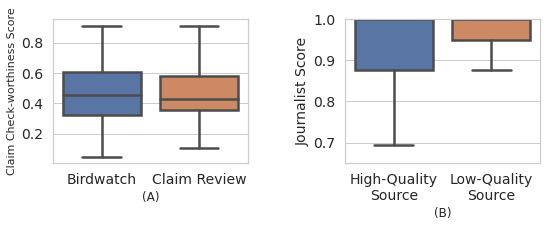

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(3)
fig.set_figwidth(8)
sns.set_theme(style="whitegrid")



sns.boxplot(data=data,linewidth=2.5,ax=ax1,showfliers=False)
ax1.set_xlabel('(A)')
ax1.tick_params(labelsize=14)
ax1.set_ylabel('Claim Check-worthiness Score',fontsize=11)


sns.boxplot(y=ng_scores,x=BW_scores, showfliers = False,linewidth=2.5,ax=ax2)
sns.swarmplot(y=ng_scores,x=BW_scores_text_2,color=".25",s=0,ax=ax2)
ax2.set_ylabel('Journalist Score',fontsize=14)
ax2.set_xlabel('(B)')
ax2.tick_params(labelsize=14)
ax2.set_ylim(0.65,1)


plt.tight_layout()
plt.subplots_adjust(
                    wspace=0.5)
wrap_labels(ax2,13)
plt.savefig('BoxPlots2.png',dpi=100,bbox_inches='tight')
plt.show()

